# Respostas para Processo Seletivo - IEEE Computational Intelligence Society, UnB

Sou **Guilherme Braga Pinto**, me formei em Engenharia da Computação na Universidade de Brasília no começo de 2023 (acredito que tudo bem eu participar do processo mesmo já tendo formado, mas qualquer coisa me avisem). Realizei pesquisas na área de Dados Semânticos por meio de PIBIC e do meu TCC, rendendo uma publicação na área.

Sou Engenheiro de Dados faz cerca de 4 anos, atualmente trabalho tempo integral na Unidade de Inteligência Artifical e Analítica do Banco do Brasil desde o final de 2023. Minha stack é primariamente Spark em linguagem Python para ambiente Big Data, mas quando realizava estágio na área eu usava Pandas. Também venho de um background de desenvolvimento de *software*, já tendo trabalhado com desenvolvimento de *backend*.

Multidisciplinaridade é extremamente relevante e mesmo como Engenheiro de Dados o processo de entendimento de construção de modelos como um todo é muito importante para a carreira, logo hoje foco meus estudos também em Ciência de Dados e IA. Não dei prosseguimento no meu mestrado na UnB por questão de tempo, mas sigo fazendo pós-graduação e tenho desejo de retornar para UnB eventualmente.

Segue meu [LinkedIn](https://www.linkedin.com/in/gui8600k/).

[Github do projeto](https://github.com/gui1080/ieee_ps/tree/master)

## Escolhi rodar esse desafio usando PySpark.

***Tá, mas por que raios?***

Trata-se de uma stack open source e amplamente adotada na indústria para ingestão/tratamento de dados massivos. É um ambiente que permite personalização por meio de diferentes bibliotecas (desde NLP até Machine Learning e Grafos) e simples interação com ambiente de arquivos distribuídos da própria Apache, o Hadoop.

Mas o Spark brilha ao fazer a gestão transparente de computação distribuída sem você ter que escrever algoritmos baseados em *map reduce* na unha. Acaba que é uma solução muito comum de se ver de instalação em ambiente corporativo para Big Data hoje em dia. Além do mais, dá pra usar SQL como uma forma de manipulação em cima do ambiente Spark, então, **nice**.


---


"*Para armazenar, gerenciar e processar big data, o Apache Hadoop separa os conjuntos de dados em subconjuntos ou partições menores. Em seguida, armazena as partições em uma rede distribuída de servidores. Da mesma forma, o Apache Spark processa e analisa big data em nós distribuídos para fornecer insights de negócios.*"

Logo o PySpark é a interface Python dessa ambiente.

---


O *dataset* dessa tarefa não justifica levar uma lança-mísseis para uma briga de faca, mas acredito ser uma boa pratica dependendo do cliente termos um caminho claro para escalabilidade, logo realizando uma boa gestão em termos de governança de dados em longo prazo. Isso é algo que hoje é interessante dado os volumes massivos de dados sendo gerados. Imagine um banco de dados que ocupa terabytes inteiros! Não tem laptop que aguente. Aí que ambientes de big data encontram seu lugar.

**Mas em última instância, PySpark é um padrão de indústria para ETL e vai me consumir menos tempo para programar então é isso 🙂.  Como engenheiro de dados, vou levar minha solução para este caminho.**

[Recomendação de refência](https://www.oreilly.com/library/view/spark-the-definitive/9781491912201/)

---

### ***Disclaimers***

Evitei a geração de gráficos para entregar resultados mais rápido, mas eu realmente não acho que a qualidade do entregável foi comprometida. Considero algumas análises que foram entregues bem surperficiais, mas feitas com um intuito puramente demonstrativo, para responder diretamente a pergunta feita, entregando valor dentro do prazo dado.

Não segui padrões de projeto nessa entrega também, apenas estruturei a entrega como um relatório para evitar a necessidade de reescrever tudo como um relatório, **meu relatório é este notebook**. Células de texto dividem perguntas e suas respectivas respostas com o código usado entre eles, com prints evidenciando.

## Spark SQL e DataFrame

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

## Spark Streaming

Executando em cima do Spark, o recurso de streaming no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em streaming e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

## Spark MLlib
Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar pipelines de aprendizado de máquina práticos.

## Spark Core
É o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (Resilient Distributed Dataset) e recursos de computação na memória.

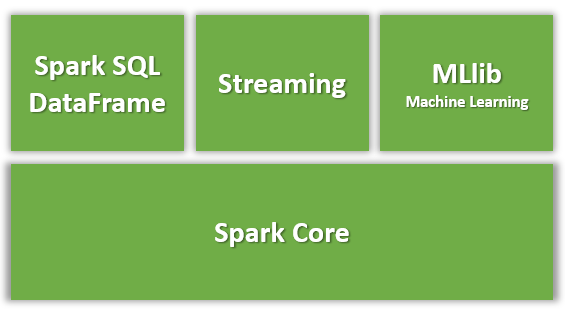

# Passo 0 - Instalando dependências e configurando o Spark

Estou rodando este Notebook em Google Colab para simplificar reprodutibilidade e me permitir desenvolver em mais de uma máquina sem ter que me importar com manutenção de dependências. Execute as instalações em sua instância do Google Colab e tenha os mesmos resultados, dado que se trata de um ambiente encapsulado.

In [7]:
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

In [8]:
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [4]:
# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b00f890535112de87176ce82f94257323b6f475746b320edf3ee70ded55104c1
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [9]:
import os
import findspark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [99]:
findspark.init()

In [100]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("IEEE UnB") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

In [101]:
from scipy import stats
import numpy as np

### Aqui vamos ver se nossa sessão spark está correta

No caso está rodando tudo em memória. Dá para ver a gestão de recursos computacionais/execução de processos usando o NGROK para olhar para a porta 4050 da nossa sessão Spark. Por isso que apertar a "Spark UI" abaixo não leva para lugar algum.

Seriam as instruções a seguir, mas não pretendo usar esse recurso.

```
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok authtoken DIGITE AQUI O SEU AUTHTOKEN')
get_ipython().system_raw('./ngrok http 4050 &')

!curl -s http://localhost:4050/api/tunnels
```

Mas Spark é massa, tem como não.

In [102]:
spark

## Carregando os dados

No caso tenho esses dados gravados no diretório declarado abaixo, lendo os dados diretamente do meu Google Drive pessoal. Logo para reprodutibilidade é um pré-requisito guardar os dados no Drive e atualizar o *path* caso necessário. No caso isso é uma exemplificação do potencial de uso real do Spark, que se dá bem em ambientes *Big Data*.

Estou lendo esses dados de um csv com separador ",".

In [103]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import functions as F
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.window import Window
from pyspark.ml import Pipeline
from pyspark.ml.stat import Correlation

In [104]:
# Estou definindo préviamente os esquemas do dataframe para não ter que dar cast depois
# já lerei tudo com os nomes e tipos corretos

schema = StructType([
    StructField('ID', IntegerType(), True),
    StructField('Age', StringType(), True),
    StructField('Gender', StringType(), True),
    StructField('Education', StringType(), True),
    StructField('Country', StringType(), True),
    StructField('Ethnicity', StringType(), True),
    StructField('Income (USD)', FloatType(), True),
    StructField('Nscore', FloatType(), True),
    StructField('Escore', FloatType(), True),
    StructField('Oscore', FloatType(), True),
    StructField('AScore', FloatType(), True),
    StructField('Cscore', FloatType(), True),
    StructField('Impulsive', FloatType(), True),
    StructField('SS', FloatType(), True),
    StructField('Alcohol', StringType(), True),
    StructField('Amphet', StringType(), True),
    StructField('Amyl', StringType(), True),
    StructField('Benzos', StringType(), True),
    StructField('Caff', StringType(), True),
    StructField('Cannabis', StringType(), True),
    StructField('Choc', StringType(), True),
    StructField('Coke', StringType(), True),
    StructField('Crack', StringType(), True),
    StructField('Ecstasy', StringType(), True),
    StructField('Heroin', StringType(), True),
    StructField('Ketamine', StringType(), True),
    StructField('Legalh', StringType(), True),
    StructField('LSD', StringType(), True),
    StructField('Meth', StringType(), True),
    StructField('Mushrooms', StringType(), True),
    StructField('Nicotine', StringType(), True),
    StructField('Semer', StringType(), True),
    StructField('VSA', StringType(), True)
])

In [105]:
path = '/content/drive/MyDrive/IEEE_UnB/Drugs.csv'
drugs_df = spark\
            .read\
            .format("csv")\
            .schema(schema)\
            .option("header", True)\
            .option("delimiter", ",")\
            .load(path)\

drugs_df.count()

1884

In [106]:
# Confirmando que nossa leitura foi correta
drugs_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- Income (USD): float (nullable = true)
 |-- Nscore: float (nullable = true)
 |-- Escore: float (nullable = true)
 |-- Oscore: float (nullable = true)
 |-- AScore: float (nullable = true)
 |-- Cscore: float (nullable = true)
 |-- Impulsive: float (nullable = true)
 |-- SS: float (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Amphet: string (nullable = true)
 |-- Amyl: string (nullable = true)
 |-- Benzos: string (nullable = true)
 |-- Caff: string (nullable = true)
 |-- Cannabis: string (nullable = true)
 |-- Choc: string (nullable = true)
 |-- Coke: string (nullable = true)
 |-- Crack: string (nullable = true)
 |-- Ecstasy: string (nullable = true)
 |-- Heroin: string (nullable = true)
 |-- Ketamine: string (nullable = true)
 |-- Legalh:

In [107]:
drugs_df.show(10, truncate=False)

+---+-----+------+---------------------------------+-------+---------+------------+--------+--------+--------+--------+--------+---------+--------+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|ID |Age  |Gender|Education                        |Country|Ethnicity|Income (USD)|Nscore  |Escore  |Oscore  |AScore  |Cscore  |Impulsive|SS      |Alcohol|Amphet|Amyl|Benzos|Caff|Cannabis|Choc|Coke|Crack|Ecstasy|Heroin|Ketamine|Legalh|LSD|Meth|Mushrooms|Nicotine|Semer|VSA|
+---+-----+------+---------------------------------+-------+---------+------------+--------+--------+--------+--------+--------+---------+--------+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|2  |25-34|M     |Doctorate degree                 |UK     |White    |null        |-0.67825|1.93886 |1.43533 |0.76096 |-0.14277|-0.71126 |-0.21575|CL5    |CL2   |CL2 |CL0   |CL6 

### 1 - Limpeza dos dados
No caso deve-se executar os passos mais simples e básicos, até porque não é desejável alterar a natureza do dado.

Esses passos são:



* Confirmar que todos os registros do dataframe possuem atributo identificador preenchido
* Caso um dos scores esteja pendente, substituir por zero
* Campos de strings descritivas, caso pedente, adicionar categoria "desconhecido"
* Income, onde Null, passa a zerar.
* Para todas as drogas, caso Null, adicionar categoria "CL0". Ou seja, vou assumir que quem não declarou o uso da droga nunca teve contato mesmo.




In [108]:
# quantos nulos em cada coluna?
drugs_df.select([F.count(F.when(F.isnull(c), 1)).alias(c) for c in drugs_df.columns]).show()

+---+---+------+---------+-------+---------+------------+------+------+------+------+------+---------+---+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
| ID|Age|Gender|Education|Country|Ethnicity|Income (USD)|Nscore|Escore|Oscore|AScore|Cscore|Impulsive| SS|Alcohol|Amphet|Amyl|Benzos|Caff|Cannabis|Choc|Coke|Crack|Ecstasy|Heroin|Ketamine|Legalh|LSD|Meth|Mushrooms|Nicotine|Semer|VSA|
+---+---+------+---------+-------+---------+------------+------+------+------+------+------+---------+---+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|  0|  0|     4|        3|      1|        2|        1861|     4|     3|     3|     4|     5|        4|  7|      3|     2|   2|     2|   4|       1|   2|   1|    1|      0|     0|       0|     0|  0|   0|        0|       0|    0|  0|
+---+---+------+---------+-------+---------+------------+------+----

In [109]:
# Vou botar "Unknown" onde é nulo para "Gender", "Education", "Country" e "Ethnicity"
drugs_df = drugs_df.fillna(value="Unknown", subset=["Gender", "Education", "Country", "Ethnicity"])

# onde está nulo para histórico de drogas, assumo que a pessoa nunca usou a droga mesmo
drugs_df = drugs_df.fillna(value="CL0", subset=["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc",
                                                "Coke", "Crack"])

# nulos numéricos eu vou botar zero mesmo
drugs_df = drugs_df.fillna(value=0, subset=["Income (USD)", "Nscore", "Escore", "Oscore", "AScore", "Cscore", "Impulsive", "SS"])


In [110]:
# e os dados categóricos para uso de drogas, será que só tem os dados das categorias previstas?
Alcohol_vals = drugs_df.select('Alcohol').distinct().toPandas()['Alcohol'].to_list()
Amphet_vals = drugs_df.select('Amphet').distinct().toPandas()['Amphet'].to_list()
Amyl_vals = drugs_df.select('Amyl').distinct().toPandas()['Amyl'].to_list()
Benzos_vals = drugs_df.select('Benzos').distinct().toPandas()['Benzos'].to_list()
Caff_vals = drugs_df.select('Caff').distinct().toPandas()['Caff'].to_list()
Cannabis_vals = drugs_df.select('Cannabis').distinct().toPandas()['Cannabis'].to_list()
Choc_vals = drugs_df.select('Choc').distinct().toPandas()['Choc'].to_list()
Coke_vals = drugs_df.select('Coke').distinct().toPandas()['Coke'].to_list()
Crack_vals = drugs_df.select('Crack').distinct().toPandas()['Crack'].to_list()
Ecstasy_vals = drugs_df.select('Ecstasy').distinct().toPandas()['Ecstasy'].to_list()
Heroin_vals = drugs_df.select('Heroin').distinct().toPandas()['Heroin'].to_list()
Ketamine_vals = drugs_df.select('Ketamine').distinct().toPandas()['Ketamine'].to_list()
Legalh_vals = drugs_df.select('Legalh').distinct().toPandas()['Legalh'].to_list()
LSD_vals = drugs_df.select('LSD').distinct().toPandas()['LSD'].to_list()
Meth_vals = drugs_df.select('Meth').distinct().toPandas()['Meth'].to_list()
Mushrooms_vals = drugs_df.select('Mushrooms').distinct().toPandas()['Mushrooms'].to_list()
Nicotine_vals = drugs_df.select('Nicotine').distinct().toPandas()['Nicotine'].to_list()
Semer_vals = drugs_df.select('Semer').distinct().toPandas()['Semer'].to_list()
VSA_vals = drugs_df.select('VSA').distinct().toPandas()['VSA'].to_list()

## Valores para contato prévio com as drogas

- CL0 Nunca Usou
- CL1 Usou Mais de Uma Década Atrás
- CL2 Usou nos Últimos Dez Anos
- CL3 Usou no Último Ano (59 vezes)
- CL4 Usou nos Últimos Meses
- CL5 Usou na Última Semana
- CL6 Usou Hoje

De [acordo](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://assets.publishing.service.gov.uk/media/5a7c3217ed915d7d70d1d359/frequent-drug-use-tabs-1213.ods&ved=2ahUKEwiyzvzEg_2GAxWMrpUCHZFECgAQFnoECBAQAw&usg=AOvVaw3iS9ZJ5DlCwcU0Umra6Xqe) com o Governo do Reino Unido, abuso de substância é caracterizada pelo uso mais de uma vez no mês no último ano. No caso para caracterização, vou considerar abuso de substância as categorias CL4, CL5 e CL6.

In [111]:
# Se todas as listas dos distintos valores das categorias são iguais, então tá tudo correto
assert len(Alcohol_vals) == len(Amphet_vals), "Erro!"
assert len(Amphet_vals) == len(Amyl_vals), "Erro!"
assert len(Amyl_vals) == len(Benzos_vals), "Erro!"
assert len(Benzos_vals) == len(Caff_vals), "Erro!"
assert len(Caff_vals) == len(Cannabis_vals), "Erro!"
assert len(Cannabis_vals) == len(Choc_vals), "Erro!"
assert len(Choc_vals) == len(Coke_vals), "Erro!"
assert len(Coke_vals) == len(Crack_vals), "Erro!"
assert len(Crack_vals) == len(Ecstasy_vals), "Erro!"
assert len(Ecstasy_vals) == len(Heroin_vals), "Erro!"
assert len(Heroin_vals) == len(Ketamine_vals), "Erro!"
assert len(Ketamine_vals) == len(Legalh_vals), "Erro!"
assert len(Legalh_vals) == len(LSD_vals), "Erro!"
assert len(LSD_vals) == len(Meth_vals), "Erro!"
assert len(Meth_vals) == len(Mushrooms_vals), "Erro!"
assert len(Mushrooms_vals) == len(Nicotine_vals), "Erro!"
assert len(VSA_vals) == len(Alcohol_vals), "Erro!"

In [112]:
#assert len(Nicotine_vals) == len(Semer_vals), "Erro!"
#assert len(Semer_vals) == len(VSA_vals), "Erro!"

# no caso aqui dá erro porque "Semer"
# não tem CL6 nem CL5, mas não tá errado
# de resto tudo ok a priori

print(Semer_vals)

['CL3', 'CL0', 'CL2', 'CL4', 'CL1']


In [113]:
# limpeza no nome dos países
drugs_df = drugs_df.withColumn("Country", F.when(drugs_df.Country == "EUA","USA")\
                                          .otherwise(F.when(drugs_df.Country == "UNKNOWN","OTHER")\
                                          .otherwise(F.col("Country"))))

In [114]:
# Com isso eu assumo que a limpeza de dados está ok
drugs_df.show(10, truncate=False)

+---+-----+------+---------------------------------+-------+---------+------------+--------+--------+--------+--------+--------+---------+--------+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|ID |Age  |Gender|Education                        |Country|Ethnicity|Income (USD)|Nscore  |Escore  |Oscore  |AScore  |Cscore  |Impulsive|SS      |Alcohol|Amphet|Amyl|Benzos|Caff|Cannabis|Choc|Coke|Crack|Ecstasy|Heroin|Ketamine|Legalh|LSD|Meth|Mushrooms|Nicotine|Semer|VSA|
+---+-----+------+---------------------------------+-------+---------+------------+--------+--------+--------+--------+--------+---------+--------+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|2  |25-34|M     |Doctorate degree                 |UK     |White    |0.0         |-0.67825|1.93886 |1.43533 |0.76096 |-0.14277|-0.71126 |-0.21575|CL5    |CL2   |CL2 |CL0   |CL6 



---



### 2 - Distribuição de idade da amostra

Diferenças significativas nas faixas etárias predominantes de consumo entre os grupos de usuários de diferentes substâncias?

A análise exploratória continua...

In [115]:
def confusion_matrix_ger(df, x, y):
    """
    Esta função é usada para gerar uma tabela de contingência (ou matriz de confusão) entre duas variáveis categóricas.

    Parâmetros:
    df (DataFrame): DataFrame de entrada.
    x (str): Nome da primeira variável.
    y (str): Nome da segunda variável.

    Retorna:
    confusion_matrix (DataFrame): DataFrame que representa a tabela de contingência entre as variáveis 'x' e 'y'.
    """

    # Gera a tabela de contingência
    confusion_matrix = df.crosstab(x, y).orderBy(x+"_"+y)

    # Converte o DataFrame Spark para um DataFrame Pandas e define a primeira coluna como índice
    confusion_matrix = confusion_matrix.toPandas().set_index(confusion_matrix.columns[0])

    return confusion_matrix

In [116]:
def cramers_v(confusion_matrix):
    """
    Esta função é usada para verificar a correlação entre duas variáveis categóricas usando o Teste V de Cramér.
    Assume valor de 0 a 1, sendo 0 correlação inexistente e 1 correlação perfeita.

    Parâmetros:
    confusion_matrix (numpy.ndarray): Matriz de confusão entre as duas variáveis categóricas, pode ser gerada usando a função confusion_matrix_ger.

    Retorna:
    float: O coeficiente de Cramér que representa a correlação entre as duas variáveis categóricas. Varia de 0 (nenhuma correlação) a 1 (correlação perfeita).
    """
    # Calcule o teste qui-quadrado
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)

    # Calcule o coeficiente de Cramér
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [117]:
drugs = ["Alcohol", "Caff", "Choc", "Legalh", "Nicotine", "Semer", "Amphet", "Amyl", "Benzos", "Cannabis", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "LSD", "Mushrooms", "VSA"]


In [118]:
high_cramer_drugs = []

for drug in drugs:
  confusion_matrix = confusion_matrix_ger(drugs_df,"Age",drug)

  # correlação entre variáveis categóricas
  result = cramers_v(confusion_matrix)

  if result > 0.15:
    high_cramer_drugs.append(drug)
    print("---------------" + str(drug) + "---------------")
    print("Cramer's V")
    print(cramers_v(confusion_matrix))

---------------Legalh---------------
Cramer's V
0.21535740448035212
---------------Nicotine---------------
Cramer's V
0.1868907414695494
---------------Amphet---------------
Cramer's V
0.19623870993507417
---------------Amyl---------------
Cramer's V
0.1515080748295497
---------------Cannabis---------------
Cramer's V
0.2399296692801532
---------------Coke---------------
Cramer's V
0.1739147071519111
---------------Ecstasy---------------
Cramer's V
0.20356026875249492
---------------LSD---------------
Cramer's V
0.2322360057109874
---------------Mushrooms---------------
Cramer's V
0.2216107724818049
---------------VSA---------------
Cramer's V
0.15611399780572957


In [119]:
# para as drogas com valores altos, agrupo e vejo os valores predominantes
for drug in high_cramer_drugs:
  print("---------------" + str(drug) + "---------------")
  drugs_df.groupBy('Age', drug)\
                  .agg(F.count('*').alias("count"))\
                  .orderBy("count", ascending=False)\
                  .show(truncate = False)

---------------Legalh---------------
+-----+------+-----+
|Age  |Legalh|count|
+-----+------+-----+
|25-34|CL0   |293  |
|35-44|CL0   |265  |
|45-54|CL0   |250  |
|18-24|CL3   |208  |
|18-24|CL0   |189  |
|18-24|CL2   |92   |
|55-64|CL0   |80   |
|18-24|CL4   |74   |
|25-34|CL3   |67   |
|25-34|CL2   |60   |
|18-24|CL5   |43   |
|18-24|CL6   |36   |
|35-44|CL3   |33   |
|35-44|CL2   |30   |
|25-34|CL4   |24   |
|25-34|CL6   |17   |
|65+  |CL0   |16   |
|25-34|CL5   |12   |
|45-54|CL3   |12   |
|45-54|CL2   |11   |
+-----+------+-----+
only showing top 20 rows

---------------Nicotine---------------
+-----+--------+-----+
|Age  |Nicotine|count|
+-----+--------+-----+
|18-24|CL6     |243  |
|25-34|CL6     |152  |
|25-34|CL0     |109  |
|35-44|CL6     |109  |
|18-24|CL0     |107  |
|45-54|CL0     |102  |
|18-24|CL3     |91   |
|18-24|CL5     |84   |
|35-44|CL0     |78   |
|45-54|CL6     |75   |
|25-34|CL2     |68   |
|18-24|CL4     |68   |
|35-44|CL1     |62   |
|45-54|CL1     |58   |
|25

### 2 - Resultado

- Legalh - relação forte, pouco uso. Uso expressivo na faixa: 18-24 anos (CL3).

- Nicotine - relação forte, muito uso. Uso expressivo na faixa: 18-24/25-34 (CL6). Nenhum uso expressivo na faixa: 25-34 (CL0).

- Amphet - relação forte, pouco uso. Uso maior na faixa: 18-24 (CL3).

- Amyl - relação forte, pouco uso. Uso maior na faixa: 25-34 e 18-24 (CL2).

- Cannabis - relação forte, muito uso. Uso maior na faixa: 18-24 (CL6 e CL5).

- Coke - relação forte, pouco uso. Uso maior na faixa: 18-24/25-34 (CL3 e CL2 respectivamente).

- Ecstasy - relação forte, pouco uso. Uso maior na faixa: 18-24 (CL3 e CL4).

- LSD - relação forte, pouco uso. Uso maior na faixa: 18-24 (CL3).

- Mushrooms - relação forte, pouco uso. Uso maior na faixa: 18-24 (CL3).

- VSA - relação forte, pouco uso. Uso maior na faixa: 18-24 (CL2).

- **Faixa etária de interesse: 18-24 anos aparenta ser uma faixa etária de risco.**



---



### 3- Relação entre nível educacional e consumo de drogas?

Usarei *Chi-Square Test/Cramer's V*, para validação de hipótese de correlação entre duas variáveis categóricas, partindo da função da questão anterior, no qual fiz as funções para matar duas coisas de uma vez.

*Chi-Square Test* é uma métrica que define se há relação entre variável dependente e variável independente. É uma medida de significância estatística.

*Cramer's V* parte disso, medindo o quão forte a correlação parece ser. É uma medida de significância substancial.

In [120]:
high_cramer_drugs = []

for drug in drugs:
  confusion_matrix = confusion_matrix_ger(drugs_df,"Education",drug)

  # correlação entre variáveis categóricas
  result = cramers_v(confusion_matrix)

  if result > 0.10:
    high_cramer_drugs.append(drug)
    print("---------------" + str(drug) + "---------------")
    print("Cramer's V")
    print(cramers_v(confusion_matrix))

---------------Legalh---------------
Cramer's V
0.14150389748236752
---------------Nicotine---------------
Cramer's V
0.1319182393779792
---------------Amphet---------------
Cramer's V
0.12192574811719646
---------------Cannabis---------------
Cramer's V
0.16758262734729473
---------------Ecstasy---------------
Cramer's V
0.12212699036738742
---------------LSD---------------
Cramer's V
0.1314764129932907
---------------Mushrooms---------------
Cramer's V
0.14077999873367633


In [121]:
# para as drogas com valores altos, agrupo e vejo os valores predominantes
for drug in high_cramer_drugs:
  print("---------------" + str(drug) + "---------------")
  drugs_df.groupBy('Education', drug)\
                  .agg(F.count('*').alias("count"))\
                  .orderBy("count", ascending=False)\
                  .show(truncate = False)

---------------Legalh---------------
+----------------------------------------------------+------+-----+
|Education                                           |Legalh|count|
+----------------------------------------------------+------+-----+
|University degree                                   |CL0   |319  |
|Masters degree                                      |CL0   |199  |
|Professional certificate/ diploma                   |CL0   |186  |
|Some college or university, no certificate or degree|CL0   |167  |
|Some college or university, no certificate or degree|CL3   |150  |
|Left school at 16 years                             |CL0   |73   |
|Some college or university, no certificate or degree|CL2   |68   |
|Doctorate degree                                    |CL0   |67   |
|University degree                                   |CL3   |64   |
|University degree                                   |CL2   |51   |
|Some college or university, no certificate or degree|CL4   |50   |
|Left schoo

### 3 - Resposta

**Respondendo a questão 3**:

Sim, há relação relevante para algumas drogas.

**Respondendo a questão 10**:

- Uso de Legalh aparenta ter muitos grupos de níveis educacionais maiores que nunca tiveram contato com a droga. A relação é negativa (maior nível educacional, menor uso). Categoria de interesse: "dropouts" com nível CL3 (o resto das categorias com maior uso não apresentam uso considerável).

- Uso de Nicotina aparenta parenta ter muitos grupos de níveis educacionais maiores que tiveram contato com a droga. A relação é positiva (maior nível educacional, maior uso). Categoria de interesse: pessoas que terminaram o ensino superior que nunca tiveram contato com a droga (o resto das categorias com maior uso apresentam uso considerável).

- Uso de Amphet aparenta ter muitos grupos de níveis educacionais maiores que nunca tiveram contato com a droga. A relação é negativa (maior nível educacional, menor uso). Categoria de interesse: "dropouts" no topo das pessoas que tiveram contato com a droga com categoria CL3. Categoria de interesse: pessoas que terminaram o ensino superior que nunca tiveram contato com a droga (o resto das categorias com maior uso apresentam uso considerável).

- Uso de cannabis aparenta estar fortemente ligado com o nível educacional "Some college or university, no certificate or degree". Ou seja, pessoas que entram na universidade e saem, além de pessoas que terminaram a universidade ("University degree"), em categoria CL6. A relação é positiva (maior nível educacional, maior uso). Categoria de interesse: pessoas que terminaram o ensino superior que nunca tiveram contato com a droga (o resto das categorias com maior uso apresentam uso considerável).

- Uso de Ecstasy aparenta ter muitos grupos de níveis educacionais maiores que nunca tiveram contato com a droga. A relação é negativa (maior nível educacional, menor uso). Categoria de interesse: "dropouts" no topo das pessoas que tiveram contato com a droga com categoria CL3/CL2/CL4 (o resto das categorias com maior uso não apresentam uso considerável).

- Uso de LSD aparenta ter muitos grupos de níveis educacionais maiores que nunca tiveram contato com a droga. A relação é negativa (maior nível educacional, menor uso). Categoria de interesse: "dropouts" no topo das pessoas que tiveram contato com a droga com categoria CL3 (o resto das categorias com maior uso não apresentam uso considerável).

- Uso de Mushrooms aparenta ter muitos grupos de níveis educacionais maiores que nunca tiveram contato com a droga. A relação é negativa (maior nível educacional, menor uso). Categoria de interesse: "dropouts" no topo das pessoas que tiveram contato com a droga com categoria CL3/CL2/CL4 (o resto das categorias com maior uso não apresentam uso considerável).



---



### 4 - Como o gênero influencia no consumo de drogas alucinógenas (LSD, cstasy, Ketamine, Cannabis e Mushrooms)? Explique.

In [122]:
print("Uso de LSD grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('LSD') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

print("\nUso de Ecstasy grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('Ecstasy') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

print("\nUso de Ketamine grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('Ketamine') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

print("\nUso de Cannabis grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('Cannabis') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

print("\nUso de Mushrooms grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('Mushrooms') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

Uso de LSD grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |287      |
|M      |528      |
|Unknown|1        |
+-------+---------+


Uso de Ecstasy grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |327      |
|M      |536      |
|Unknown|1        |
+-------+---------+


Uso de Ketamine grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |125      |
|M      |269      |
|Unknown|1        |
+-------+---------+


Uso de Cannabis grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |643      |
|M      |826      |
|Unknown|2        |
+-------+---------+


Uso de Mushrooms grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+------

In [123]:
print("\nUsuários 'limpos'\nUso de alucinógenos grouped_by Gênero para pessoas que NÃO tiveram contato prévio com nenhuma das drogas")
drugs_df.filter( (F.col('LSD').isin(['CL0', 'CL1'])) |  (F.col('Ecstasy').isin(['CL0', 'CL1'])) | (F.col('Ketamine').isin(['CL0', 'CL1'])) | (F.col('Cannabis').isin(['CL0', 'CL1'])) | (F.col('Mushrooms').isin(['CL0', 'CL1'])))\
        .groupBy("Gender")\
        .agg(F.countDistinct('ID'))\
        .show(truncate=False)


Usuários 'limpos'
Uso de alucinógenos grouped_by Gênero para pessoas que NÃO tiveram contato prévio com nenhuma das drogas
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |875      |
|M      |785      |
|Unknown|3        |
+-------+---------+



In [124]:
print("Uso de LSD grouped_by Gênero para pessoas que abusaram da droga")
lsd_abuse = drugs_df.filter(F.col('LSD').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
lsd_abuse.show(truncate=False)
v1dist_m_ver_f = lsd_abuse.collect()[1][1]/(lsd_abuse.collect()[0][1]+lsd_abuse.collect()[1][1])

print("Homens são " + f"{v1dist_m_ver_f:.2%}" + " do total")

print("\nUso de Ecstasy grouped_by Gênero para pessoas que abusaram da droga")
ecstasy_abuse = drugs_df.filter(F.col('Ecstasy').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
ecstasy_abuse.show(truncate=False)
v2dist_m_ver_f = ecstasy_abuse.collect()[1][1]/(ecstasy_abuse.collect()[0][1]+ecstasy_abuse.collect()[1][1])

print("Homens são " + f"{v2dist_m_ver_f:.2%}" + " do total")

print("\nUso de Ketamine grouped_by Gênero para pessoas que abusaram da droga")
ketamine_abuse = drugs_df.filter(F.col('Ketamine').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
ketamine_abuse.show(truncate=False)
v3dist_m_ver_f = ketamine_abuse.collect()[1][1]/(ketamine_abuse.collect()[0][1]+ketamine_abuse.collect()[1][1])

print("Homens são " + f"{v3dist_m_ver_f:.2%}" + " do total")

print("\nUso de Cannabis grouped_by Gênero para pessoas que abusaram da droga")
cannabis_abuse = drugs_df.filter(F.col('Cannabis').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
cannabis_abuse.show(truncate=False)
v4dist_m_ver_f = cannabis_abuse.collect()[1][1]/(cannabis_abuse.collect()[0][1]+cannabis_abuse.collect()[1][1])

print("Homens são " + f"{v4dist_m_ver_f:.2%}" + " do total")

print("\nUso de Mushrooms grouped_by Gênero para pessoas que abusaram da droga")
mushrooms_abuse = drugs_df.filter(F.col('Mushrooms').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
mushrooms_abuse.show(truncate=False)
v5dist_m_ver_f = mushrooms_abuse.collect()[1][1]/(mushrooms_abuse.collect()[0][1]+mushrooms_abuse.collect()[1][1])

print("Homens são " + f"{v5dist_m_ver_f:.2%}" + " do total")

Uso de LSD grouped_by Gênero para pessoas que abusaram da droga
+------+---------+
|Gender|count(ID)|
+------+---------+
|F     |43       |
|M     |123      |
+------+---------+

Homens são 74.10% do total

Uso de Ecstasy grouped_by Gênero para pessoas que abusaram da droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |76       |
|M      |163      |
|Unknown|1        |
+-------+---------+

Homens são 68.20% do total

Uso de Ketamine grouped_by Gênero para pessoas que abusaram da droga
+------+---------+
|Gender|count(ID)|
+------+---------+
|F     |19       |
|M     |60       |
+------+---------+

Homens são 75.95% do total

Uso de Cannabis grouped_by Gênero para pessoas que abusaram da droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |262      |
|M      |524      |
|Unknown|1        |
+-------+---------+

Homens são 66.67% do total

Uso de Mushrooms grouped_by Gênero para pessoas que abusaram da droga
+------+---------+
|Gender|count(ID)

In [125]:
media = (v5dist_m_ver_f+v4dist_m_ver_f+v3dist_m_ver_f+v2dist_m_ver_f+v1dist_m_ver_f)/5

print("Em média: " + str(f"{media:.2%}") + " homens.")


Em média: 71.83% homens.


### 4 -Resposta

Agrupando quem teve **algum contato com a droga**, podemos afirmar que nessa base de estudo mais homens usaram alucinógenos do que mulheres. O mesmo pode ser dito ao agrupar o uso dado sexo para pessoas que efetivamente **abusaram** da substância.

Não é muito interessante a noção de que isso explica o uso de uma substância dado gênero, *minha resposta é mais uma análise exploratória dos dados que se tem em mãos*. Para responder de fato como uma coisa influencia outra, um estudo mais aprofundado deve ser conduzido.



---



### 5 - Proporção de usuários impulsivos e seu uso de drogas

In [126]:
impulsive_users = drugs_df.filter(F.col('Impulsive') > 0)
not_impulsive_users = drugs_df.filter(F.col('Impulsive') < 0)

very_impulsive_users = drugs_df.filter(F.col('Impulsive') > 0.5)
not_very_impulsive_users = drugs_df.filter(F.col('Impulsive') < 0.5)

drug_cols = ["Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine", "Semer", "VSA"]

mode_values_impulsive_users = [[i,impulsive_users.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in drug_cols]
mode_values_not_impulsive_users = [[i,not_impulsive_users.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in drug_cols]

In [127]:
proporcao = impulsive_users.count()/(impulsive_users.count()+not_impulsive_users.count())
proporcao_very_impulsive = very_impulsive_users.count()/(very_impulsive_users.count()+not_very_impulsive_users.count())

print("Autoentitulados como impulsivos (nota maior que 0) representam " + f"{proporcao:.2%}" + " da base.")
print("Autoentitulados como MUITO impulsivos (nota maior que 0.5) representam " + f"{proporcao_very_impulsive:.2%}" + " da base.")

Autoentitulados como impulsivos (nota maior que 0) representam 49.20% da base.
Autoentitulados como MUITO impulsivos (nota maior que 0.5) representam 35.56% da base.


In [128]:
for i in range(len(mode_values_impulsive_users)):
  if((str(mode_values_impulsive_users[i][1]) != "CL0") | (str(mode_values_not_impulsive_users[i][1]) != "CL0")):
    print("------------------------------------------")
    print(mode_values_impulsive_users[i][0])
    print("Valor mais frequente para usuários impulsivos - " + str(mode_values_impulsive_users[i][1]))
    print("Valor mais frequente para usuários não impulsivos - " + str(mode_values_not_impulsive_users[i][1]))
    print("------------------------------------------")

------------------------------------------
Alcohol
Valor mais frequente para usuários impulsivos - CL5
Valor mais frequente para usuários não impulsivos - CL5
------------------------------------------
------------------------------------------
Caff
Valor mais frequente para usuários impulsivos - CL6
Valor mais frequente para usuários não impulsivos - CL6
------------------------------------------
------------------------------------------
Cannabis
Valor mais frequente para usuários impulsivos - CL6
Valor mais frequente para usuários não impulsivos - CL0
------------------------------------------
------------------------------------------
Choc
Valor mais frequente para usuários impulsivos - CL6
Valor mais frequente para usuários não impulsivos - CL6
------------------------------------------
------------------------------------------
Nicotine
Valor mais frequente para usuários impulsivos - CL6
Valor mais frequente para usuários não impulsivos - CL0
-------------------------------------

### 5 - Resposta

Usuários mais impulsivos tiveram aumento sensível de abuso de Nicotina e Cannabis ao se realizar uma análise por alto dos padrões de consumo mais comuns para as drogas (análise de moda).



---



### 6 - Variáveis discretas ou contínuas

Categorizar variável por variável na base.

Capaz que tenha uma função ou um jeito de automatizar isso, mas eu fiz rápido na mão mesmo.

## 6 - Respostas
```
 |-- ID: Quantitativa discreta
 |-- Age: Qualitativa ordinal
 |-- Gender: Qualitativa nominal
 |-- Education: Qualitativa ordinal
 |-- Country: Qualitativa nominal
 |-- Ethnicity: Qualitativa nominal
 |-- Income (USD): Quantitativa contínua
 |-- Nscore: Quantitativa contínua
 |-- Escore: Quantitativa contínua
 |-- Oscore: Quantitativa contínua
 |-- AScore: Quantitativa contínua
 |-- Cscore: Quantitativa contínua
 |-- Impulsive: Quantitativa contínua
 |-- SS: Quantitativa contínua
 |-- Alcohol: Qualitativa ordinal
 |-- Amphet: Qualitativa ordinal
 |-- Amyl: Qualitativa ordinal
 |-- Benzos: Qualitativa ordinal
 |-- Caff: Qualitativa ordinal
 |-- Cannabis: Qualitativa ordinal
 |-- Choc: Qualitativa ordinal
 |-- Coke: Qualitativa ordinal
 |-- Crack: Qualitativa ordinal
 |-- Ecstasy: Qualitativa ordinal
 |-- Heroin: Qualitativa ordinal
 |-- Ketamine: Qualitativa ordinal
 |-- Legalh: Qualitativa ordinal
 |-- LSD: Qualitativa ordinal
 |-- Meth: Qualitativa ordinal
 |-- Mushrooms: Qualitativa ordinal
 |-- Nicotine: Qualitativa ordinal
 |-- Semer: Qualitativa ordinal
 |-- VSA: Qualitativa ordinal
```





---



### 7 - Proporção de drogas lícitas e ilícitas

Definição da legislação brasileira.

In [129]:
# não vou considerar Cannabis como uma droga legalizada, apesar de descriminalizada
# vou considerar a droga de controle como legal, afinal provavelmente foi algo usado em um estudo controlado
# mas para essa analise isso é debatível, fica a dúvida

legal_drugs = ["Alcohol", "Caff", "Choc", "Legalh", "Nicotine", "Semer"]
not_legal_drugs = ["Amphet", "Amyl", "Benzos", "Cannabis", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "LSD", "Mushrooms", "VSA"]

abuse_categories = ["CL4", "CL5", "CL6"]
casual_categories = ["CL3", "CL2"]
clean_categories = ["CL1", "CL0"]

legal_drugs_abuse_count = 0
legal_drugs_casual_count = 0
legal_drugs_clean_count = 0

not_legal_drugs_abuse_count = 0
not_legal_drugs_casual_count = 0
not_legal_drugs_clean_count = 0

for i in legal_drugs:
  legal_drugs_abuse_count = legal_drugs_abuse_count + drugs_df.filter(F.col(i).isin(abuse_categories)).count()
  legal_drugs_casual_count = legal_drugs_casual_count + drugs_df.filter(F.col(i).isin(casual_categories)).count()
  legal_drugs_clean_count = legal_drugs_clean_count + drugs_df.filter(F.col(i).isin(clean_categories)).count()


for i in not_legal_drugs:
  not_legal_drugs_abuse_count = not_legal_drugs_abuse_count + drugs_df.filter(F.col(i).isin(abuse_categories)).count()
  not_legal_drugs_casual_count = not_legal_drugs_casual_count + drugs_df.filter(F.col(i).isin(casual_categories)).count()
  not_legal_drugs_clean_count = not_legal_drugs_clean_count + drugs_df.filter(F.col(i).isin(clean_categories)).count()



In [130]:
print("Contagem - abuso de drogas legais - " + str(legal_drugs_abuse_count))
print("Contagem - uso casual de drogas legais - " + str(legal_drugs_casual_count))
print("Contagem - não uso de drogas legais - " + str(legal_drugs_clean_count))
print("---------------------------------------")
print("Contagem - abuso de drogas ilegais - " + str(not_legal_drugs_abuse_count))
print("Contagem - uso casual de drogas ilegais - " + str(not_legal_drugs_casual_count))
print("Contagem - não uso de drogas ilegais - " + str(not_legal_drugs_clean_count))

Contagem - abuso de drogas legais - 6207
Contagem - uso casual de drogas legais - 1327
Contagem - não uso de drogas legais - 3770
---------------------------------------
Contagem - abuso de drogas ilegais - 2275
Contagem - uso casual de drogas ilegais - 4477
Contagem - não uso de drogas ilegais - 15856


In [131]:
print("O número de ocorrências de abuso de drogas legais é " + f"{(legal_drugs_abuse_count/not_legal_drugs_abuse_count):.2}" + " vezes o número do abuso de drogas ilegais.")
print("O número de ocorrências de uso casual de drogas legais é " + f"{(legal_drugs_casual_count/not_legal_drugs_casual_count):.2}" + " vezes o número do uso casual de drogas ilegais.")
print("O número de ocorrências de não usar de drogas legais é " + f"{(legal_drugs_clean_count/not_legal_drugs_clean_count):.2}" + " vezes o número do não uso de drogas ilegais.")

O número de ocorrências de abuso de drogas legais é 2.7 vezes o número do abuso de drogas ilegais.
O número de ocorrências de uso casual de drogas legais é 0.3 vezes o número do uso casual de drogas ilegais.
O número de ocorrências de não usar de drogas legais é 0.24 vezes o número do não uso de drogas ilegais.


### 7 - Resposta

No print acima, proporção de 2.7 vezes o abuso de substância de drogas legais para as ilegais.



---



### 8 - Quais fatores predizem que uma pessoa vá usar crack

A solução que me vem em mente seria fazer uma árvore de decisão simples de explicabilidade alta. Ver as ramificações da árvore para ver onde as decisões são tomadas, assim analizando a *feature importance*.


In [132]:
# transformamos as colunas em numéricas
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(drugs_df) for column in ["Age", "Gender", "Education", "Country", "Ethnicity", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]]

pipeline = Pipeline(stages=indexers)
data = pipeline.fit(drugs_df).transform(drugs_df)

my_features = ["Age_index", "Gender_index", "Education_index", "Country_index", "Ethnicity_index", "Income (USD)", "Nscore", "Escore", "Oscore", "AScore", "Cscore", "Impulsive", "SS", "Alcohol_index", "Amphet_index", "Amyl_index", "Benzos_index", "Caff_index", "Cannabis_index", "Choc_index", "Coke_index", "Ecstasy_index", "Heroin_index", "Ketamine_index", "Legalh_index", "LSD_index", "Meth_index", "Mushrooms_index", "Nicotine_index", "Semer_index", "VSA_index"]

# vetorizamos as colunas de features
assembler = VectorAssembler(inputCols=my_features, outputCol="features")
data = assembler.transform(data)

# split em treino e teste
train_data, test_data = data.randomSplit([0.75, 0.25], seed=42) # 42 is the answer!



In [133]:
# treina modelo

dt_classifier = DecisionTreeClassifier(labelCol="Crack_index", featuresCol="features")
model = dt_classifier.fit(train_data)

In [134]:
# testamos o modelo pela medida de acurácia, vendo base de teste e base de treino

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="Crack_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.87


In [135]:
feature_importance = model.featureImportances.toArray()

# Show feature importance
for i, column in enumerate(assembler.getInputCols()):
  if feature_importance[i] > 0.1:
    print(f"Feature '{column}': {feature_importance[i]}")

Feature 'Coke_index': 0.1589928638616732
Feature 'Heroin_index': 0.508432407203983


### 8 - Resposta

Ao se analizar as features mais importantes de uma árvore de decisão que determina o uso de crack, podemos determinar que o uso de Crack está altamente correlacionado com o uso de Metanfetamina, Cocaína e Heroína.



---



### 9 - Média de pontuações e correlação entre elas

Nscore, Escore, Oscore, Ascore, Cscore

In [137]:
# todas as médias tendem ao seu ponto central

print("Média de Nscore" + str(drugs_df.agg({"Nscore": "avg"}).collect()))
print("Média de Escore" + str(drugs_df.agg({"Escore": "avg"}).collect()))
print("Média de Oscore" + str(drugs_df.agg({"Oscore": "avg"}).collect()))
print("Média de Ascore" + str(drugs_df.agg({"Ascore": "avg"}).collect()))
print("Média de Cscore" + str(drugs_df.agg({"Cscore": "avg"}).collect()))

Média de Nscore[Row(avg(Nscore)=-0.000974322979648908)]
Média de Escore[Row(avg(Escore)=0.0003141220211646581)]
Média de Oscore[Row(avg(Oscore)=0.00045784975494991695)]
Média de Ascore[Row(avg(Ascore)=-0.0012808284107318855)]
Média de Cscore[Row(avg(Cscore)=-0.0025678862508133277)]


In [138]:
colunas_corr = ["Nscore", "Escore", "Oscore", "AScore", "Cscore"]

assembler = VectorAssembler(inputCols=colunas_corr, outputCol="features")
df_vector = assembler.transform(drugs_df).select("features")

# Compute correlation matrix
pearson_corr = Correlation.corr(df_vector, "features").head()
corr_matrix = pearson_corr[0]

# Display correlation matrix
print("Pearson correlation matrix:")
print(colunas_corr)
print(corr_matrix)

Pearson correlation matrix:
['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore']
DenseMatrix([[ 1.        , -0.43051715,  0.01099634, -0.21604125, -0.39128845],
             [-0.43051715,  1.        ,  0.24460806,  0.15831685,  0.30916016],
             [ 0.01099634,  0.24460806,  1.        ,  0.03829202, -0.05622299],
             [-0.21604125,  0.15831685,  0.03829202,  1.        ,  0.24892846],
             [-0.39128845,  0.30916016, -0.05622299,  0.24892846,  1.        ]])


### Resposta 9

As médias tendem ao seu ponto central.

Maiores correlações (positivas) ocorrem entre CScore e Ascore (0.24), além de CScore e OScore (0.30).

Maiores correlações (negativas) ocorrem entre Nscore e CScore (-0.39) e NScore e Escore (-0.43).

### 10 - Relação entre educação e consumo de drogas

In [139]:
# Condensado na questão 3

### 10 - Resposta

In [150]:
# Condensado na questão 3



---



### 11 - Árvore de decisão

No enunciado dizia "para determinada substância" então eu vou copiar o código da questão 8 e fazer uma decision tree que tem target a variável de Crack.

In [140]:
# transformamos as colunas em numéricas
# para essa quetão isolei as outras variáveis que descrevem uso de drogas
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(drugs_df) for column in ["Age", "Gender", "Education", "Country", "Ethnicity", "Crack"]]

pipeline = Pipeline(stages=indexers)
data = pipeline.fit(drugs_df).transform(drugs_df)

my_features = ["Age_index", "Gender_index", "Education_index", "Country_index", "Ethnicity_index", "Income (USD)", "Nscore", "Escore", "Oscore", "AScore", "Cscore", "Impulsive", "SS"]

# vetorizamos as colunas de features
assembler = VectorAssembler(inputCols=my_features, outputCol="features")
data = assembler.transform(data)

# split em treino e teste
train_data, test_data = data.randomSplit([0.75, 0.25], seed=42) # 42 is the answer!

In [141]:
# treina modelo

dt_classifier = DecisionTreeClassifier(labelCol="Crack_index", featuresCol="features")
model = dt_classifier.fit(train_data)

In [142]:
# testamos o modelo pela medida de acurácia, vendo base de teste e base de treino

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="Crack_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.85


In [143]:
feature_importance = model.featureImportances.toArray()

# Show feature importance
for i, column in enumerate(assembler.getInputCols()):
  if feature_importance[i] > 0.1:
    print(f"Feature '{column}': {feature_importance[i]}")

Feature 'Age_index': 0.21922393289911293
Feature 'Education_index': 0.15880523840234412
Feature 'Country_index': 0.2936376356200459


### 11 - Resposta

Decision tree com acurácia de 0.85 ao invés de 0.87 usando o uso de outras drogas como features. Antes heroína era uma variável de peso, agora é o país e idade do usuário.

É interessante analizando as variáveis de maior impacto nessa árvore de decisão, na da questão 8 outras drogas foram importantes mas a acurácia aumentou pouco.

Valeria investigar mais, mas me faz sentido que heroína seja uma droga correlata ao uso de outra droga pesada. Afinal a questão 8 dizia "fatores que predizem uso de crack" e a questão 11 foi mais literal, pedindo mesmo a decision tree sem outras drogas nas features.



---



### 12 - Correlação entre idade ("Age") e substâncias ilícitas

In [144]:
def determine_trend(values):
    increasing_count = 0
    decreasing_count = 0

    for i in range(len(values) - 1):
        if values[i] < values[i + 1]:
            increasing_count += 1
        elif values[i] > values[i + 1]:
            decreasing_count += 1

    if increasing_count > decreasing_count:
        return "Aumentando"
    elif decreasing_count > increasing_count:
        return "Diminuindo"
    else:
        return "Indefinido"

# Define the UDF
trend_udf = F.udf(determine_trend, StringType())

In [145]:
not_legal_drugs = ["Amphet", "Amyl", "Benzos", "Cannabis", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "LSD", "Mushrooms", "VSA"]

abuse_categories = ["CL4", "CL5", "CL6"]
casual_categories = ["CL3", "CL2"]
clean_categories = ["CL1", "CL0"]

for drug in not_legal_drugs:

  print("-------------------------------" + str(drug) + "-------------------------------")

  print("Categoria - Abuso de substâncias")

  df_abuse1 = drugs_df.filter(F.col(drug).isin(abuse_categories)).groupBy("Age").agg(F.countDistinct('ID')).orderBy("Age", ascending=True)

  df_abuse1 = df_abuse1.withColumn("tendência", trend_udf(F.collect_list(F.col("count(ID)")).over(Window.orderBy("Age"))))

  df_abuse1.show(truncate=False)

  # ---------------------------------------

  print("Categoria - Uso casual")

  df_abuse2 = drugs_df.filter(F.col(drug).isin(casual_categories)).groupBy("Age").agg(F.countDistinct('ID')).orderBy("Age", ascending=True)

  df_abuse2 = df_abuse2.withColumn("tendência", trend_udf(F.collect_list(F.col("count(ID)")).over(Window.orderBy("Age"))))

  df_abuse2.show(truncate=False)

  # ---------------------------------------

  print("Categoria - Usuário limpo")

  df_abuse3 = drugs_df.filter(F.col(drug).isin(clean_categories)).groupBy("Age").agg(F.countDistinct('ID')).orderBy("Age", ascending=True)

  df_abuse3 = df_abuse3.withColumn("tendência", trend_udf(F.collect_list(F.col("count(ID)")).over(Window.orderBy("Age"))))

  df_abuse3.show(truncate=False)

  # ---------------------------------------


-------------------------------Amphet-------------------------------
Categoria - Abuso de substâncias
+-----+---------+----------+
|Age  |count(ID)|tendência |
+-----+---------+----------+
|18-24|131      |Indefinido|
|25-34|60       |Diminuindo|
|35-44|20       |Diminuindo|
|45-54|25       |Diminuindo|
|55-64|2        |Diminuindo|
+-----+---------+----------+

Categoria - Uso casual
+-----+---------+----------+
|Age  |count(ID)|tendência |
+-----+---------+----------+
|18-24|205      |Indefinido|
|25-34|141      |Diminuindo|
|35-44|64       |Diminuindo|
|45-54|22       |Diminuindo|
|55-64|8        |Diminuindo|
+-----+---------+----------+

Categoria - Usuário limpo
+-----+---------+----------+
|Age  |count(ID)|tendência |
+-----+---------+----------+
|18-24|307      |Indefinido|
|25-34|280      |Diminuindo|
|35-44|271      |Diminuindo|
|45-54|247      |Diminuindo|
|55-64|83       |Diminuindo|
|65+  |18       |Diminuindo|
+-----+---------+----------+

-------------------------------Amy

### 12 - Resposta

A tendência é que as ocorrências do uso de substâncias ilícitas diminui com a idade.



---



### 13 - Drogas mais e menos usadas por país

In [146]:
df_usa = drugs_df.filter(F.col('Country') == 'USA')
df_ireland = drugs_df.filter(F.col('Country') == 'Republic of Ireland')
df_canada = drugs_df.filter(F.col('Country') == 'Canada')
df_nz = drugs_df.filter(F.col('Country') == 'New Zealand')
df_australia = drugs_df.filter(F.col('Country') == 'Australia')
df_uk = drugs_df.filter(F.col('Country') == 'UK')

drug_cols = ["Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine", "Semer", "VSA"]

mode_values_usa = [[i,df_usa.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in drug_cols]
mode_values_ireland = [[i,df_ireland.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in drug_cols]
mode_values_canada = [[i,df_canada.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in drug_cols]
mode_values_nz = [[i,df_nz.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in drug_cols]
mode_values_australia = [[i,df_australia.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in drug_cols]
mode_values_uk = [[i,df_uk.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in drug_cols]

In [147]:
least_used_values_usa = [[i,df_usa.groupby(i).count().orderBy("count", ascending=True).first()[0]] for i in drug_cols]
least_used_values_ireland = [[i,df_ireland.groupby(i).count().orderBy("count", ascending=True).first()[0]] for i in drug_cols]
least_used_values_canada = [[i,df_canada.groupby(i).count().orderBy("count", ascending=True).first()[0]] for i in drug_cols]
least_used_values_nz = [[i,df_nz.groupby(i).count().orderBy("count", ascending=True).first()[0]] for i in drug_cols]
least_used_values_australia = [[i,df_australia.groupby(i).count().orderBy("count", ascending=True).first()[0]] for i in drug_cols]
least_used_values_uk = [[i,df_uk.groupby(i).count().orderBy("count", ascending=True).first()[0]] for i in drug_cols]

In [148]:
least_used_list = [least_used_values_usa, least_used_values_ireland, least_used_values_canada, least_used_values_nz, least_used_values_australia, least_used_values_uk]
paises = ["USA", "Republic of Ireland", "Canada", "New Zealand", "Australia", "UK"]

for least_used in least_used_list:
  print("------------------------------------------")
  print(paises[least_used_list.index(least_used)])
  for i in range(len(drug_cols)):
    if(least_used[i][1] == "CL0" or least_used[i][1] == "CL1"):
      print("Drogas menos frequentes - " + str(least_used[i][0]) + " - " + str(least_used[i][1]))

------------------------------------------
USA
Drogas menos frequentes - Alcohol - CL1
Drogas menos frequentes - Benzos - CL1
Drogas menos frequentes - Caff - CL0
Drogas menos frequentes - Cannabis - CL1
Drogas menos frequentes - Legalh - CL1
Drogas menos frequentes - Meth - CL1
Drogas menos frequentes - Nicotine - CL1
------------------------------------------
Republic of Ireland
Drogas menos frequentes - Alcohol - CL0
Drogas menos frequentes - Amphet - CL1
Drogas menos frequentes - Nicotine - CL0
Drogas menos frequentes - Semer - CL0
------------------------------------------
Canada
Drogas menos frequentes - Alcohol - CL0
Drogas menos frequentes - Cannabis - CL1
Drogas menos frequentes - Semer - CL0
------------------------------------------
New Zealand
Drogas menos frequentes - Amyl - CL0
Drogas menos frequentes - Crack - CL0
Drogas menos frequentes - Ecstasy - CL0
Drogas menos frequentes - LSD - CL0
Drogas menos frequentes - Semer - CL0
------------------------------------------
Au

In [149]:
modes = [mode_values_usa, mode_values_ireland, mode_values_canada, mode_values_nz, mode_values_australia, mode_values_uk]
paises = ["USA", "Republic of Ireland", "Canada", "New Zealand", "Australia", "UK"]

for mode in modes:
  print("------------------------------------------")
  print(paises[modes.index(mode)])
  for i in range(len(drug_cols)):
    if(mode[i][1] == "CL5" or mode[i][1] == "CL6"):
      print("Drogas mais frequentes - " + str(mode[i][0]) + " - " + str(mode[i][1]))

------------------------------------------
USA
Drogas mais frequentes - Alcohol - CL5
Drogas mais frequentes - Caff - CL6
Drogas mais frequentes - Cannabis - CL6
Drogas mais frequentes - Choc - CL6
Drogas mais frequentes - Nicotine - CL6
------------------------------------------
Republic of Ireland
Drogas mais frequentes - Alcohol - CL5
Drogas mais frequentes - Caff - CL6
Drogas mais frequentes - Cannabis - CL6
Drogas mais frequentes - Choc - CL5
Drogas mais frequentes - Nicotine - CL6
------------------------------------------
Republic of Ireland
Drogas mais frequentes - Alcohol - CL5
Drogas mais frequentes - Caff - CL6
Drogas mais frequentes - Cannabis - CL6
Drogas mais frequentes - Choc - CL5
Drogas mais frequentes - Nicotine - CL6
------------------------------------------
New Zealand
Drogas mais frequentes - Caff - CL6
Drogas mais frequentes - Cannabis - CL6
Drogas mais frequentes - Choc - CL6
------------------------------------------
Australia
Drogas mais frequentes - Alcohol -

### 13 - Resposta

No print acima.



---



In [151]:
spark.stop()